# Classification des sentiments
### SOYKOK Aylin 28711545 - CELIK Simay 28713301
## Analyse des données et des prétraitements

<b>
Ce notebook était créé afin de : <br>
    -se familiariser avec les données <br>
    -se familiariser avec des pretraitements <br>
    -se familiariser avec des N-grammes <br>
    -tester des pretraitements et des N-grammes 1 par 1 <br>
</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import codecs
import re
import os.path
import string
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from collections import Counter
from nltk.corpus import stopwords
from utils_donnee import *
from evaluation import *

# Chargement des données
path = "./datasets/movies/movies1000/"
alltxts,alllabs = load_movies(path)

## Se familiariser avec les données

In [2]:
print(f'Taille texts : {len(alltxts)}, taille labels {len(alllabs)}')
print("Un exemple de text et son label")
print(alltxts[0][:300])
print(alllabs[0])
print("\nUn autre exemple de text et son label")
print(alltxts[-1][:300])
print(alllabs[-1])

Taille texts : 2000, taille labels 2000
Un exemple de text et son label
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the
0

Un autre exemple de text et son label
truman ( " true-man " ) burbank is the perfect name for jim carrey's character in this film . 
president truman was an unassuming man who became known worldwide , in spite of ( or was it because of ) his stature . 
 " truman " also recalls an era of plenty following a grim war , an era when planned 
1


<b> Cette base de données contient des commentaires sur les films et les labels indiquant le sentiment majoritaire d'une commentaire.<br>
Label = 0 si négatif <br>
Label = 1 si positif

In [4]:
count_neg = alllabs.count(0)
count_pos = alllabs.count(1)
print("Nombre de labels négatives:", count_neg)
print("Nombre de labels positives:", count_pos)

Nombre de labels négatives: 1000
Nombre de labels positives: 1000


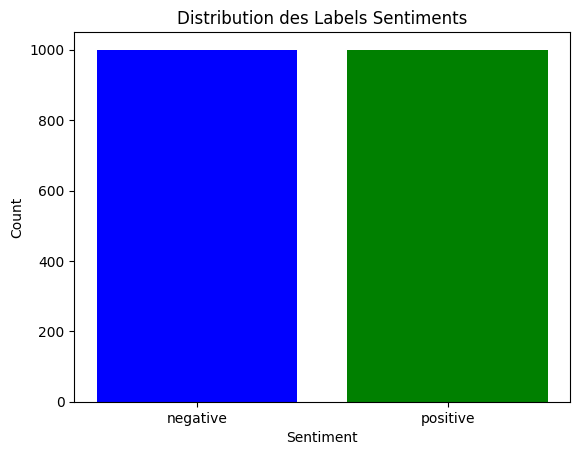

In [5]:
# Visualisation avec un histogramme

labels = ['negative', 'positive']
counts = [count_neg, count_pos]

plt.bar(labels, counts, color=['blue', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution des Labels Sentiments')
plt.show()

<b>La base de trainage est éqilibrée et donc on n'a pas bésoin d'appliquer le processus d'équilibrage.

## A) Transformation paramétrique du texte (pre-traitements) + Métriques d'évaluation

<b> Dans cette partie, on appliquera différents types de pre-traitement et décider lesquels peuvent nous servir au cours d'apprentissage.

On fait l'evaluation avec un simple split au lieu de crossval.

### test sans pretraitement

In [6]:
# test sans pretraitement
preprocessor = None
vect_params = {}
vect_params_tf, vect_params_svm = {}, {}
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
res_sans = comparaison_evaluation(preprocessor,vect_params_tf, vect_params_svm,model_params_LR,model_params_SVM)
res_sans

LOGISTIC REGRESSION
Résultats Tfidf


Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8450 	0.8510 	0.9334 	0.9342
_________________________
Résultats CountVectorizer
Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8300 	0.8333 	0.9217 	0.9204
_________________________
Taux d'accuracy de Tfidf contre Count : 1.0
_____________________________________________

SVM 
Résultats Tfidf
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8500 	0.8571 	0.9350 	0.9360
_________________________
Résultats CountVectorizer
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8300 	0.8325 	0.9138 	0.9109
_________________________
Taux d'accuracy de Tfidf contre Count : 1.0
_____________________________________________

 MultinomialNB 
Résultats Tfidf
Resultats train
Acc	F1	ROC-AUC	AP:
0.9631 	0.9623 	0.9959 	0.9959
Resultats test
Acc	

(0.845, 0.8509615384615384, 0.9334, 0.9342480384599544)

### suppression de la ponctuation

In [7]:
# test
example = alltxts[0]
example_no_ponc = ponc_suppression(example)
print("Texte originale:")
print(example[:100])
print("\nTexte après suppression de la ponctuation:")
print(example_no_ponc[:100])

Texte originale:
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 


Texte après suppression de la ponctuation:
plot  two teen couples go to a church party  drink and then drive  
they get into an accident  
one 


La suppression de la ponctuation nous servira car si on les supprime pas, ils seront comptés comme des mots et satureront la méthode BoW.

In [8]:
preprocessor = ponc_suppression
res_ponc = comparaison_evaluation(preprocessor,vect_params_tf, vect_params_svm,model_params_LR,model_params_SVM)
res_ponc

LOGISTIC REGRESSION
Résultats Tfidf
Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8550 	0.8599 	0.9371 	0.9365
_________________________
Résultats CountVectorizer
Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8275 	0.8305 	0.9257 	0.9244
_________________________
Taux d'accuracy de Tfidf contre Count : 1.0
_____________________________________________

SVM 
Résultats Tfidf
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8575 	0.8620 	0.9379 	0.9373
_________________________
Résultats CountVectorizer
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8250 	0.8267 	0.9179 	0.9135
_________________________
Taux d'accuracy de Tfidf contre Count : 1.0
_____________________________________________

 MultinomialNB 
Résultats Tfidf
Resultats train
Acc	F1	ROC-AUC	AP:
0.9675 	0.9670

(0.855, 0.8599033816425121, 0.937125, 0.9364611195941624)

In [9]:
res,nb_fois = accuracy_difference(res_ponc,res_sans)
print(f'Taux d\'accuracy de ponc_sup contre rien : {nb_fois}')

Taux d'accuracy de ponc_sup contre rien : 1.0


### suppression des lettres majuscules

In [10]:
# test
example = alltxts[38][:100]
example_no_upper = uppercase_suppression(example)
print("Texte originale:")
print(example)
print("\nTexte après suppression des lettres majuscules:")
print(example_no_upper)

Texte originale:
capsule : where are you tonight , leni rienfenstal ? 
starship troopers is an expensive , hateful an

Texte après suppression des lettres majuscules:
capsule : where are you tonight , leni rienfenstal ? 
starship troopers is an expensive , hateful an


Les textes ne semblent pas à contenir des lettres majuscules mais comme on ne peut pas être sûr sans lire tous les 2000, on peut appliquer cette transformation. Contrairement aux données de présidents, il n'y a pas de nom propre écrit en majuscule.

In [11]:
preprocessor = uppercase_suppression
res_maj = comparaison_evaluation(preprocessor,vect_params_tf, vect_params_svm,model_params_LR,model_params_SVM)
print("______________________")
res,nb_fois = accuracy_difference(res_maj,res_sans)
print(f'Taux d\'accuracy de suppression des maj contre rien : {nb_fois}')

LOGISTIC REGRESSION
Résultats Tfidf


Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8450 	0.8510 	0.9334 	0.9342
_________________________
Résultats CountVectorizer
Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8300 	0.8333 	0.9217 	0.9204
_________________________
Taux d'accuracy de Tfidf contre Count : 1.0
_____________________________________________

SVM 
Résultats Tfidf
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8500 	0.8571 	0.9350 	0.9360
_________________________
Résultats CountVectorizer
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8300 	0.8325 	0.9138 	0.9109
_________________________
Taux d'accuracy de Tfidf contre Count : 1.0
_____________________________________________

 MultinomialNB 
Résultats Tfidf
Resultats train
Acc	F1	ROC-AUC	AP:
0.9631 	0.9623 	0.9959 	0.9959
Resultats test
Acc	

### suppression des chiffres

In [12]:
### suppression chiffres
# voir s'il y a des ratings 
results = [count_ratings(text) for text in  alltxts if count_ratings(text)]
print(f"Nb de ratings total : {sum(results)}" )

Nb de ratings total : 237


Donc il y a assez de ratings dans la base de données. 

In [13]:
preprocessor = chiffre_suppression
res_chiff = comparaison_evaluation(preprocessor,vect_params_tf, vect_params_svm,model_params_LR,model_params_SVM)
print("______________________")
res,nb_fois = accuracy_difference(res_chiff,res_sans)
print(f'Taux d\'accuracy de chiffre_sup contre rien : {nb_fois}')

LOGISTIC REGRESSION
Résultats Tfidf


Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8450 	0.8517 	0.9352 	0.9354
_________________________
Résultats CountVectorizer
Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8350 	0.8390 	0.9205 	0.9192
_________________________
Taux d'accuracy de Tfidf contre Count : 1.0
_____________________________________________

SVM 
Résultats Tfidf
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8500 	0.8578 	0.9364 	0.9365
_________________________
Résultats CountVectorizer
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8450 	0.8473 	0.9144 	0.9122
_________________________
Taux d'accuracy de Tfidf contre Count : 1.0
_____________________________________________

 MultinomialNB 
Résultats Tfidf
Resultats train
Acc	F1	ROC-AUC	AP:
0.9619 	0.9610 	0.9957 	0.9957
Resultats test
Acc	

### suppression des balises

In [14]:
# test
# on trouve les numéros des lignes qui contiennent des balises
lines_with_tags = find_lines_with_tags(alltxts)
print(f'Nombre de lignes avec tags (train) : {len(lines_with_tags)}')


Nombre de lignes avec tags (train) : 0


In [15]:
alltxts_test = load_movies_test("./datasets/movies/testSentiment.txt")
lines_with_tags = find_lines_with_tags(alltxts_test)
print(f'Nombre de lignes avec tags (test): {len(lines_with_tags)}')

25000
Nombre de lignes avec tags (test): 14667


Dans les données de trainage il n'y a pas de balises mais dans les données de test, il y'en a beaucoup. Donc comme précaution, on peut les supprimer.

### stemming

In [16]:
# test
text_test = alltxts[840]
stemmed = stem(text_test)
print("Texte originale:")
print(text_test[:100])
print("Texte après stemmatisation:")
print(stemmed[:100])

Texte originale:
 " idle hands " is distasteful , crass and derivative . 
if an original thought found its way into t
Texte après stemmatisation:
`` idl hand `` is distast , crass and deriv . if an origin thought found it way into this horror-com


Avant de faire des tests sur l'apprentissage, on peut dire que stemming peut nous servir car ici, on analyse les sentiments donc le point important est la racine des mots

In [17]:
preprocessor = stem
res_stem = comparaison_evaluation(preprocessor,vect_params_tf, vect_params_svm,model_params_LR,model_params_SVM)
print("______________________")
res,nb_fois = accuracy_difference(res_stem,res_sans)
print(f'Taux d\'accuracy de stem contre rien : {nb_fois}')
print(res_stem)

LOGISTIC REGRESSION
Résultats Tfidf


Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8350 	0.8413 	0.9294 	0.9319
_________________________
Résultats CountVectorizer
Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8400 	0.8447 	0.9281 	0.9170
_________________________
Taux d'accuracy de Tfidf contre Count : 0.5
_____________________________________________

SVM 
Résultats Tfidf
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8425 	0.8475 	0.9318 	0.9342
_________________________
Résultats CountVectorizer
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8425 	0.8452 	0.9179 	0.9060
_________________________
Taux d'accuracy de Tfidf contre Count : 1.0
_____________________________________________

 MultinomialNB 
Résultats Tfidf
Resultats train
Acc	F1	ROC-AUC	AP:
0.9519 	0.9509 	0.9920 	0.9922
Resultats test
Acc	

### combinaison des pre-processeurs

In [18]:
preprocessor = lambda text: stem(remove_tags(transform_uppercase(chiffre_suppression(ponc_suppression(text)))))
res_tous = comparaison_evaluation(preprocessor,vect_params_tf, vect_params_svm,model_params_LR,model_params_SVM)
print("______________________")
res,nb_fois = accuracy_difference(res_tous,res_sans)
print(f'Taux d\'accuracy de tous preprocesseurs contre rien : {nb_fois}')
print(res_tous)

LOGISTIC REGRESSION
Résultats Tfidf
Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8450 	0.8517 	0.9321 	0.9339
_________________________
Résultats CountVectorizer
Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8525 	0.8557 	0.9284 	0.9187
_________________________
Taux d'accuracy de Tfidf contre Count : 0.5
_____________________________________________

SVM 
Résultats Tfidf
Résultats train
Acc	F1	ROC-AUC	AP:
0.9994 	0.9994 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8525 	0.8585 	0.9346 	0.9364
_________________________
Résultats CountVectorizer


c:\Users\PC\miniconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8450 	0.8473 	0.9184 	0.9075
_________________________
Taux d'accuracy de Tfidf contre Count : 1.0
_____________________________________________

 MultinomialNB 
Résultats Tfidf
Resultats train
Acc	F1	ROC-AUC	AP:
0.9513 	0.9503 	0.9924 	0.9926
Resultats test
Acc	F1	ROC-AUC	AP:
0.8025 	0.7969 	0.8939 	0.8979
_________________________
Résultats CountVectorizer
Resultats train
Acc	F1	ROC-AUC	AP:
0.9650 	0.9646 	0.9945 	0.9939
Resultats test
Acc	F1	ROC-AUC	AP:
0.8225 	0.8229 	0.8839 	0.8647
_________________________
Taux d'accuracy de Tfidf contre Count : 0.5
______________________________________________________
Taux d'accuracy de LinReg contre LinSVM : 0.0
Taux d'accuracy de LinReg contre Multinom : 1.0
______________________
Taux d'accuracy de tous preprocesseurs contre rien : 0.5
(0.845, 0.8516746411483254, 0.9321250000000001, 0.9338940498186696)


In [19]:
print("Resultats de tous",res_tous)
print("Resultats de rien",res_sans)

Resultats de tous (0.845, 0.8516746411483254, 0.9321250000000001, 0.9338940498186696)
Resultats de rien (0.845, 0.8509615384615384, 0.9334, 0.9342480384599544)


<b> Les preprocesseurs tous ensemble ont l'aire d'empêcher un peu l'amélioration mais on ne peut pas encore décider sans voir et tester les autres paramètres. La différence est presque négligeable et les prétraitements assurent que notre algorithme marchera sur des autres données similaires.

In [20]:
preprocessor = lambda text: transform_uppercase(chiffre_suppression(ponc_suppression(text)))
res_quelques = comparaison_evaluation(preprocessor,vect_params_tf, vect_params_svm,model_params_LR,model_params_SVM)
print("______________________")
res,nb_fois = accuracy_difference(res_quelques,res_sans)
print(f'Taux d\'accuracy de tous preprocesseurs contre rien : {nb_fois}')
print(res_tous)

LOGISTIC REGRESSION
Résultats Tfidf


Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8600 	0.8641 	0.9396 	0.9382
_________________________
Résultats CountVectorizer
Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8275 	0.8296 	0.9253 	0.9249
_________________________
Taux d'accuracy de Tfidf contre Count : 1.0
_____________________________________________

SVM 
Résultats Tfidf
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8600 	0.8641 	0.9401 	0.9388
_________________________
Résultats CountVectorizer
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8200 	0.8227 	0.9179 	0.9145
_________________________
Taux d'accuracy de Tfidf contre Count : 1.0
_____________________________________________

 MultinomialNB 
Résultats Tfidf
Resultats train
Acc	F1	ROC-AUC	AP:
0.9663 	0.9657 	0.9965 	0.9965
Resultats test
Acc	

Sans stemming, on a obtenu des résultats précis.

LOGISTIC REGRESSION
Résultats Tfidf
Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8600 	0.8641 	0.9396 	0.9382


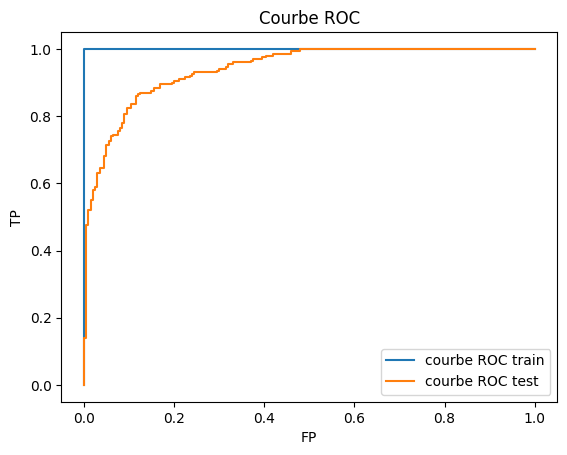

_________________________
Résultats CountVectorizer
Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8275 	0.8296 	0.9253 	0.9249


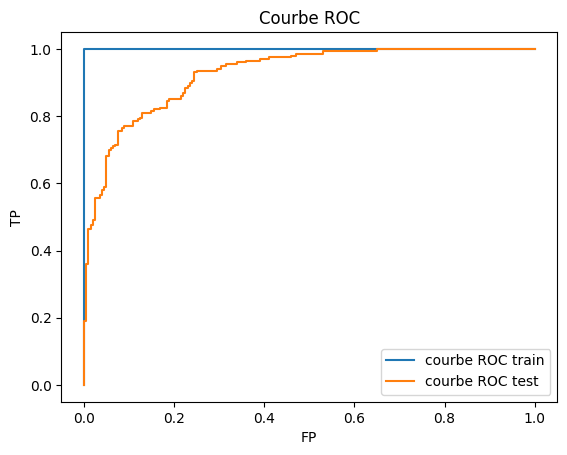

_________________________
Taux d'accuracy de Tfidf contre Count : 1.0
_____________________________________________


In [21]:
# execution avec la courbe ROC
print("LOGISTIC REGRESSION")
print("Résultats Tfidf")
lr_tfidf_sans = eval_split(preprocessor=preprocessor, vectorizer=TfidfVectorizer, vect_params=vect_params,
model=LogisticRegression, model_params=model_params_LR)
print("_________________________")
print("Résultats CountVectorizer")
lr_countv_sans = eval_split(preprocessor=preprocessor, vectorizer=CountVectorizer, vect_params=vect_params,
model=LogisticRegression, model_params=model_params_LR)
print("_________________________")
res,nb_fois = accuracy_difference(lr_tfidf_sans,lr_countv_sans)
print(f'Taux d\'accuracy de Tfidf contre Count : {nb_fois}')
print("_____________________________________________")

# B) Extraction du vocabulaire (BoW) + Métriques d'évaluation

- **Exploration préliminaire des jeux de données**
    - Quelle est la taille d'origine du vocabulaire?
    - Que reste-t-il si on ne garde que les 100 mots les plus fréquents? [word cloud]
    - Quels sont les 100 mots dont la fréquence documentaire est la plus grande? [word cloud]
    - Quels sont les 100 mots les plus discriminants au sens de odds ratio? [word cloud]
    - Quelle est la distribution d'apparition des mots (Zipf)
    - Quels sont les 100 bigrammes/trigrammes les plus fréquents?



### La taille d'origine du vocabulaire sans pre-processing

In [22]:
vectorizer = CountVectorizer() #no preprocessing
X = vectorizer.fit_transform(alltxts)
vocabulary = vectorizer.vocabulary_
print("Taille originale du vocab :",len(vocabulary))

Taille originale du vocab : 39659


### 100 mots les plus fréquents

In [23]:
max_features = 100
vectorizer =  CountVectorizer(max_features=max_features)
X = vectorizer.fit_transform(alltxts)
dic_size = X.shape[1]###

words = vectorizer.get_feature_names_out()
word_freq = dict(zip(words, X.sum(axis=0).A1))
print(dic_size)
print(words)

100
['about' 'after' 'all' 'also' 'an' 'and' 'any' 'are' 'as' 'at' 'be'
 'because' 'been' 'but' 'by' 'can' 'character' 'characters' 'could' 'do'
 'does' 'even' 'film' 'films' 'first' 'for' 'from' 'get' 'good' 'had'
 'has' 'have' 'he' 'her' 'him' 'his' 'how' 'if' 'in' 'into' 'is' 'it'
 'its' 'just' 'life' 'like' 'little' 'make' 'more' 'most' 'movie' 'much'
 'no' 'not' 'of' 'off' 'on' 'one' 'only' 'or' 'other' 'out' 'over'
 'people' 'plot' 'really' 'see' 'she' 'so' 'some' 'story' 'than' 'that'
 'the' 'their' 'them' 'then' 'there' 'they' 'this' 'time' 'to' 'too' 'two'
 'up' 'very' 'was' 'way' 'we' 'well' 'what' 'when' 'where' 'which' 'while'
 'who' 'will' 'with' 'would' 'you']


<b> Sans aucun pré-traitement, la plupart des mots les plus fréquents sont des prépositions, des conjonctions et des pronoms. Ces problèmes peuvent être résolus avec les stopwords.
    
Voici un nuage de mots les plus fréquents.

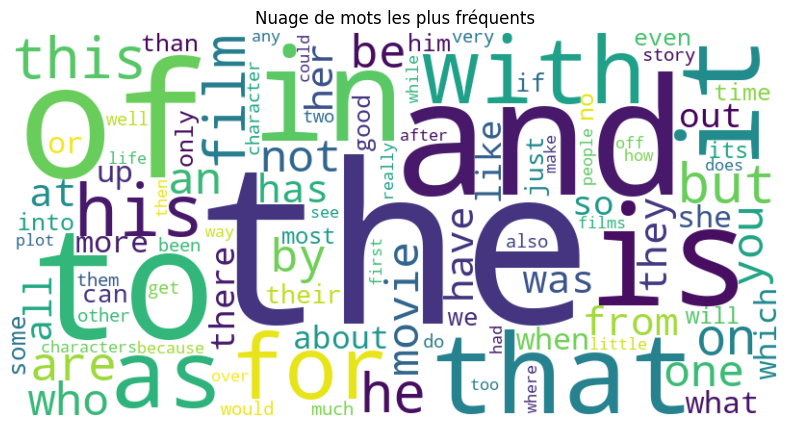

In [24]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots les plus fréquents")
plt.show()

### 100 mots les plus discriminants au sens de odds ratio

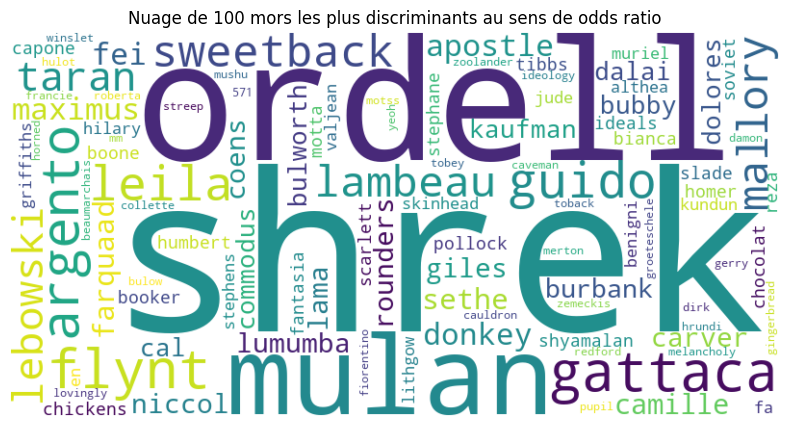

In [25]:
from sklearn.naive_bayes import MultinomialNB
vectorizer = CountVectorizer() # on utilise Count Vectorizer
X = vectorizer.fit_transform(alltxts)
clf = MultinomialNB() # on utilise naive bayes selon la loi multinomiale
clf.fit(X, alllabs)
log_probabilities = clf.feature_log_prob_
odds_ratios = np.exp(log_probabilities[1] - log_probabilities[0])
words = vectorizer.get_feature_names_out()
word_odds_ratios = dict(zip(words, odds_ratios))
sorted_word_odds_ratios = sorted(word_odds_ratios.items(), key=lambda x: x[1], reverse=True)
top_100_words = dict(sorted_word_odds_ratios[:100])
# Afficher le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_100_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de 100 mors les plus discriminants au sens de odds ratio")
plt.show()

### distribution d'apparition des mots (Zipf)

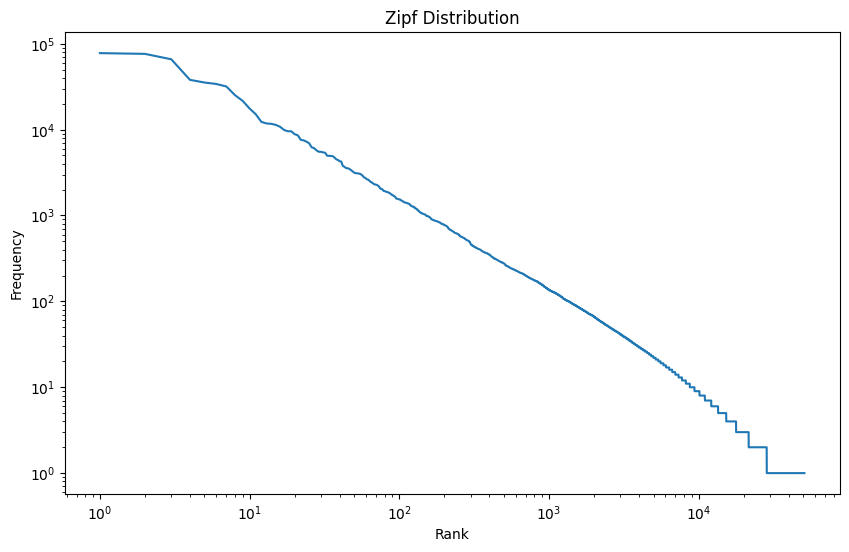

In [26]:
words = [word for text in alltxts for word in text.split()]
word_freq = Counter(words)
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
frequencies = [freq for word, freq in sorted_word_freq]

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(frequencies) + 1), frequencies)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf Distribution')
plt.xscale('log')
plt.yscale('log')
plt.show()

<b> Ici, on observe la loi de Zipf sur les fréquences des mots. Selin cette loi, dans NLP, la fréquence d'un mot est inversement proportionnel à son rang. Donc le n-ième mot le plus fréquent va apparaitre (n+1) fois plus que (n+1)-ième mot. $freq(nb\_occ)=\frac{k}{nb\_occ} $. Ce graphe est cohérent avec celui qu'on a vu dans le cours.

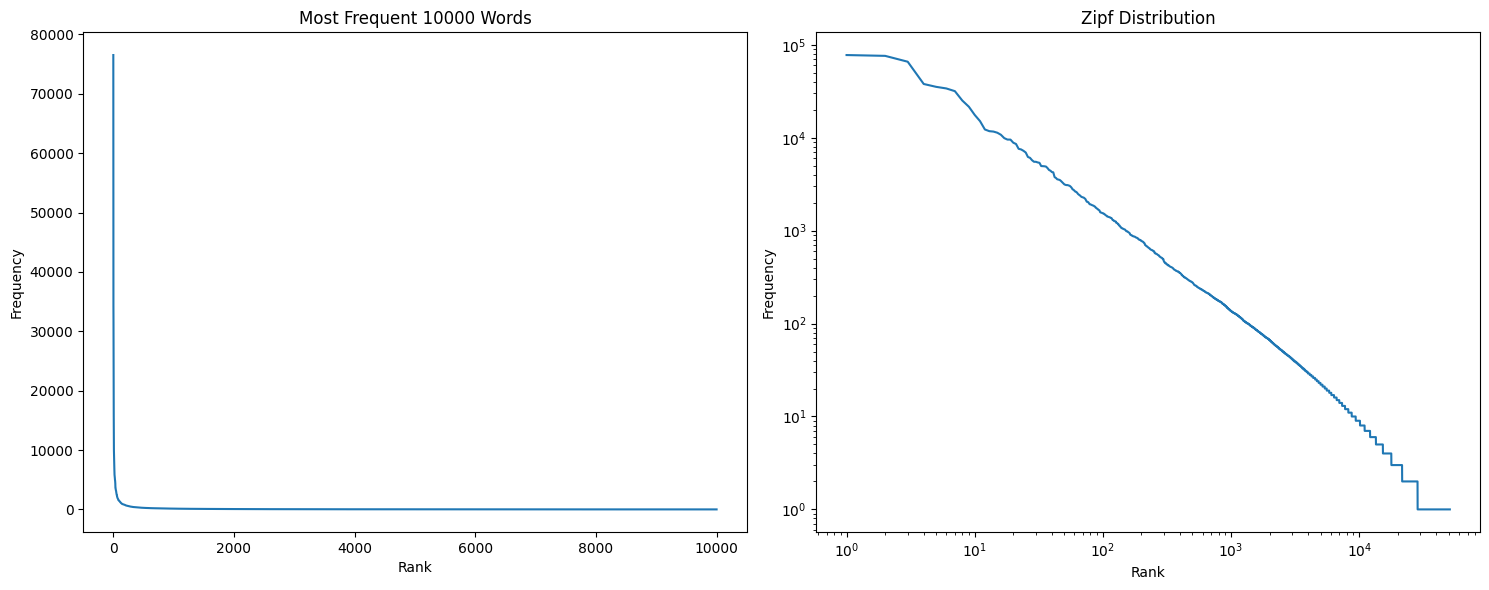

In [27]:
# Most frequent 100000 words vs Zipf Law

max_features = 10000
vectorizer =  CountVectorizer(max_features=max_features)
X = vectorizer.fit_transform(alltxts)
dic_size = X.shape[1]
words = vectorizer.get_feature_names_out()
word_freq = dict(zip(words, X.sum(axis=0).A1))
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
words_sorted, frequencies_sorted = zip(*sorted_word_freq)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(range(1, len(words_sorted) + 1), list(frequencies_sorted))
axs[0].set_title('Most Frequent 10000 Words')
axs[0].set_xlabel('Rank')
axs[0].set_ylabel('Frequency')

# Zipf
axs[1].plot(range(1, len(frequencies) + 1), frequencies)
axs[1].set_title('Zipf Distribution')
axs[1].set_xlabel('Rank')
axs[1].set_ylabel('Frequency')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

plt.tight_layout()
plt.show()

### 100 Bigrammes les plus fréquents

In [28]:
ngram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100)
X_ngrams = ngram_vectorizer.fit_transform(alltxts)
ngram_names = ngram_vectorizer.get_feature_names_out()
ngram_freq = X_ngrams.sum(axis=0).A1

ngram_freq_dict = dict(zip(ngram_names, ngram_freq))
sorted_ngrams = sorted(ngram_freq_dict.items(), key=lambda x: x[1], reverse=True)
top_100_bigrams = dict(sorted_ngrams[:100])
#for ngram, freq in top_100_bigrams:
#    print(f"{ngram}: {freq}")
print(top_100_bigrams)


{'of the': 8775, 'in the': 5805, 'the film': 4544, 'to the': 2777, 'to be': 2745, 'and the': 2535, 'on the': 2250, 'the movie': 2150, 'with the': 1902, 'for the': 1894, 'it is': 1841, 'is the': 1725, 'one of': 1681, 'as the': 1605, 'this film': 1540, 'from the': 1446, 'at the': 1336, 'that the': 1261, 'this is': 1218, 'by the': 1164, 'out of': 1017, 'of his': 1008, 'this movie': 998, 'the story': 986, 'the most': 946, 'he is': 939, 'film is': 922, 'in this': 917, 'the first': 903, 'there is': 831, 'have been': 821, 'is not': 807, 'all the': 776, 'the same': 775, 'to see': 770, 'to make': 759, 'that it': 757, 'but it': 756, 'into the': 754, 'that he': 746, 'but the': 742, 'there are': 735, 'if you': 719, 'of this': 712, 'it was': 697, 'and his': 685, 'that is': 674, 'the end': 665, 'the only': 665, 'is that': 661, 'the best': 645, 'about the': 639, 'to do': 623, 'to get': 622, 'the audience': 621, 'the plot': 617, 'in his': 611, 'and it': 594, 'they are': 589, 'of course': 569, 'more th

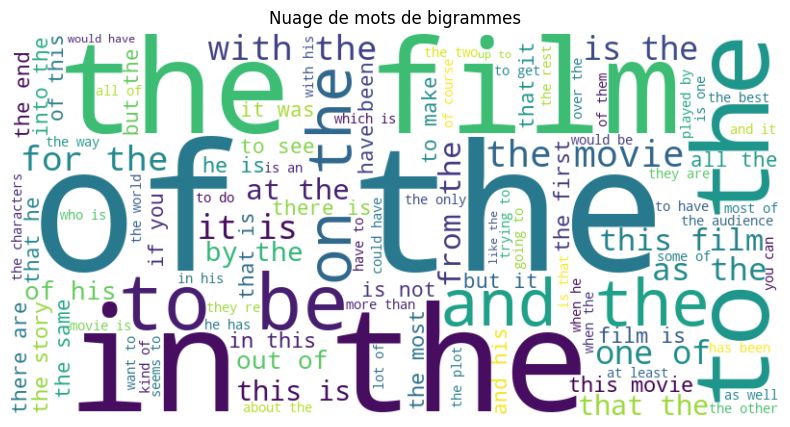

In [29]:
# Afficher le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_100_bigrams)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots de bigrammes")
plt.show()

### 100 trigrammes les plus fréquents

In [30]:
ngram_vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=100)
X_ngrams = ngram_vectorizer.fit_transform(alltxts)
ngram_names = ngram_vectorizer.get_feature_names_out()
ngram_freq = X_ngrams.sum(axis=0).A1

ngram_freq_dict = dict(zip(ngram_names, ngram_freq))
sorted_ngrams = sorted(ngram_freq_dict.items(), key=lambda x: x[1], reverse=True)
top_100_trigrams = dict(sorted_ngrams[:100])
#for ngram, freq in top_100_trigrams:
#    print(f"{ngram}: {freq}")
print(top_100_trigrams)


{'one of the': 1026, 'of the film': 886, 'in the film': 585, 'the film is': 543, 'of the movie': 375, 'some of the': 363, 'the rest of': 350, 'the fact that': 309, 'most of the': 293, 'in this film': 288, 'rest of the': 278, 'this film is': 272, 'the movie is': 263, 'is one of': 261, 'of the most': 254, 'in the movie': 248, 'the end of': 228, 'out of the': 212, 'in order to': 208, 'could have been': 194, 'seems to be': 194, 'as well as': 192, 'in this movie': 186, 'this is the': 186, 'to be the': 174, 'part of the': 172, 'of the best': 171, 'at the end': 170, 'end of the': 165, 'supposed to be': 159, 'there is no': 158, 'one of those': 151, 'all of the': 149, 'in the first': 149, 'this movie is': 148, 'of this film': 146, 'in the end': 145, 'the story is': 143, 'would have been': 143, 'on the other': 137, 'in love with': 136, 'the film and': 136, 'of the story': 133, 'the plot is': 132, 'of the characters': 130, 'the special effects': 129, 'of the year': 128, 'the story of': 127, 'out 

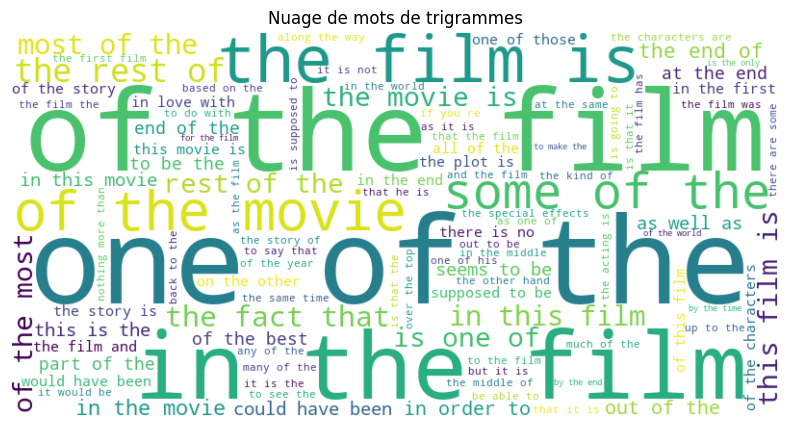

In [31]:
# Afficher le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_100_trigrams)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots de trigrammes")
plt.show()

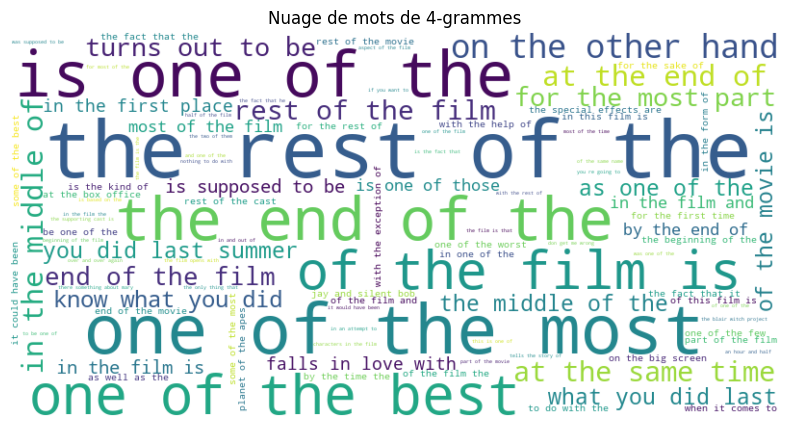

In [32]:
ngram_vectorizer = CountVectorizer(ngram_range=(4,4), max_features=100)
X_ngrams = ngram_vectorizer.fit_transform(alltxts)
ngram_names = ngram_vectorizer.get_feature_names_out()
ngram_freq = X_ngrams.sum(axis=0).A1

ngram_freq_dict = dict(zip(ngram_names, ngram_freq))
sorted_ngrams = sorted(ngram_freq_dict.items(), key=lambda x: x[1], reverse=True)
top_100_4grams = dict(sorted_ngrams[:100])

#print(top_100_4grams)
# Afficher le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_100_4grams)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots de 4-grammes")
plt.show()

### Stopwords

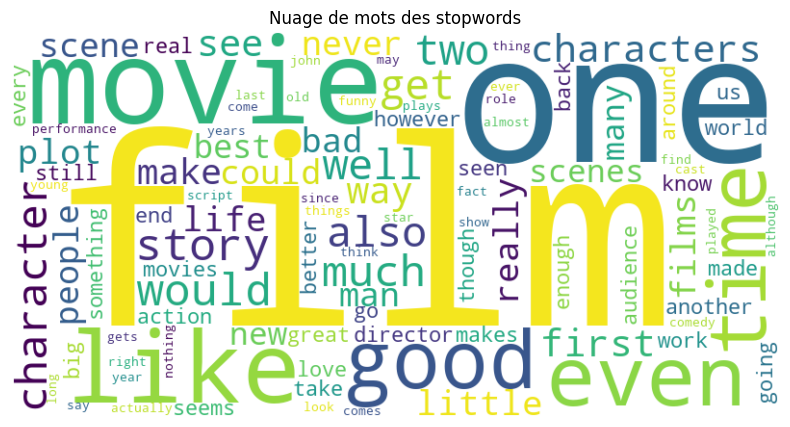

In [33]:

# les 100 mots les plus fréquents après sans considérer les stopwords
#nltk.download('stopwords')
from nltk.corpus import stopwords
max_features = 100
vectorizer = CountVectorizer(max_features=max_features, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(alltxts)
words = vectorizer.get_feature_names_out()
word_freq = dict(zip(words, X.sum(axis=0).A1))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des stopwords")
plt.show()

<b> Sans les stopwords, on voit mieux les mots indiquant les sentiments.


- **Variantes de BoW**
    - TF-IDF
    - Réduire la taille du vocabulaire (min_df, max_df, max_features)
    - BoW binaire
    - Bi-grams, tri-grams
    - **Quelles performances attendre ? Quels sont les avantages et les inconvénients des ces variantes?**

In [48]:
vect_params = {}
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
vectorizer = TfidfVectorizer
preprocessor=None
comparaison_evaluation_single(preprocessor,vectorizer,vect_params,model_params_LR,model_params_SVM,eval_func=eval_split,result_type='svm')

Comparaison des modèles : type
LOGISTIC REGRESSION
Résultats 
Resultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Resultats test
Acc	F1	ROC-AUC	AP:
0.8450 	0.8510 	0.9334 	0.9342
_____________________________________________

SVM 
Résultats
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8500 	0.8571 	0.9350 	0.9360
_____________________________________________

 MultinomialNB 
Résultats
Resultats train
Acc	F1	ROC-AUC	AP:
0.9631 	0.9623 	0.9959 	0.9959
Resultats test
Acc	F1	ROC-AUC	AP:
0.8100 	0.8010 	0.8993 	0.9023
______________________________________________________
Taux d'accuracy de LinReg contre LinSVM : 0.0
Taux d'accuracy de LinReg contre Multinom : 1.0


(0.85, 0.8571428571428571, 0.9349500000000001, 0.9360003983106512)

### Tests sur la réduction du vocabulaire


In [5]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(alltxts)
vocabulary = vectorizer.vocabulary_
max_features_list = [100,500,1000,1500,3000,3500,4000,4500,5000,10000,len(vocabulary)]
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
vectorizer = TfidfVectorizer
preprocessor=None
best_result = [0,0,0,0]
best_max = 0
for max_features in max_features_list:
    vect_params = {'max_features':max_features}
    res = eval_split(preprocessor,vectorizer,vect_params,model=LinearSVC, model_params=model_params_SVM,graphe=False)
    if accuracy_difference(res,best_result)[1] > 0.5:
        best_result = res
        best_max = max_features
print("Meilleur max_features",best_max)

Résultats train
Acc	F1	ROC-AUC	AP:
0.7425 	0.7444 	0.8295 	0.8276
Résultats test
Acc	F1	ROC-AUC	AP:
0.7500 	0.7549 	0.8120 	0.8119
Résultats train
Acc	F1	ROC-AUC	AP:
0.9144 	0.9155 	0.9705 	0.9687
Résultats test
Acc	F1	ROC-AUC	AP:
0.7925 	0.7981 	0.8799 	0.8724
Résultats train
Acc	F1	ROC-AUC	AP:
0.9606 	0.9608 	0.9926 	0.9929
Résultats test
Acc	F1	ROC-AUC	AP:
0.8325 	0.8354 	0.9197 	0.9197
Résultats train
Acc	F1	ROC-AUC	AP:
0.9806 	0.9806 	0.9978 	0.9979
Résultats test
Acc	F1	ROC-AUC	AP:
0.8525 	0.8578 	0.9280 	0.9281
Résultats train
Acc	F1	ROC-AUC	AP:
0.9938 	0.9938 	0.9998 	0.9998
Résultats test
Acc	F1	ROC-AUC	AP:
0.8600 	0.8641 	0.9388 	0.9378
Résultats train
Acc	F1	ROC-AUC	AP:
0.9944 	0.9944 	0.9999 	0.9999
Résultats test
Acc	F1	ROC-AUC	AP:
0.8575 	0.8633 	0.9403 	0.9388
Résultats train
Acc	F1	ROC-AUC	AP:
0.9944 	0.9944 	0.9999 	0.9999
Résultats test
Acc	F1	ROC-AUC	AP:
0.8500 	0.8558 	0.9377 	0.9358
Résultats train
Acc	F1	ROC-AUC	AP:
0.9956 	0.9956 	0.9999 	0.9999
Résultats test
Ac

In [6]:
#test min_df
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
vectorizer = TfidfVectorizer
preprocessor=None
best_result = [0,0,0,0]
best_min_df = 0
for min_df in np.arange(0.0, 1.0, 0.1):
    print("min_df=",min_df)
    vect_params = {'min_df':min_df}
    res = eval_split(preprocessor,vectorizer,vect_params,model=LinearSVC, model_params=model_params_SVM,graphe=False)
    if accuracy_difference(res,best_result)[1] > 0.5:
        best_result = res
        best_min_df = min_df
print("Meilleur min_df",best_min_df)

min_df= 0.0
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8500 	0.8571 	0.9350 	0.9360
min_df= 0.1
Résultats train
Acc	F1	ROC-AUC	AP:
0.9163 	0.9169 	0.9740 	0.9725
Résultats test
Acc	F1	ROC-AUC	AP:
0.8050 	0.8079 	0.8861 	0.8793
min_df= 0.2
Résultats train
Acc	F1	ROC-AUC	AP:
0.8512 	0.8520 	0.9284 	0.9279
Résultats test
Acc	F1	ROC-AUC	AP:
0.7775 	0.7855 	0.8627 	0.8475
min_df= 0.30000000000000004
Résultats train
Acc	F1	ROC-AUC	AP:
0.8069 	0.8070 	0.8927 	0.8927
Résultats test
Acc	F1	ROC-AUC	AP:
0.7850 	0.7943 	0.8598 	0.8421
min_df= 0.4
Résultats train
Acc	F1	ROC-AUC	AP:
0.7600 	0.7618 	0.8425 	0.8429
Résultats test
Acc	F1	ROC-AUC	AP:
0.7400 	0.7500 	0.8181 	0.8218
min_df= 0.5
Résultats train
Acc	F1	ROC-AUC	AP:
0.7288 	0.7288 	0.8002 	0.7933
Résultats test
Acc	F1	ROC-AUC	AP:
0.7150 	0.7246 	0.7891 	0.7826
min_df= 0.6000000000000001
Résultats train
Acc	F1	ROC-AUC	AP:
0.7050 	0.7076 	0.7806 	0.7688
Résultats test
Acc	F1	ROC-AUC	AP:

In [7]:
#test max_df
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
vectorizer = TfidfVectorizer
preprocessor=None
best_result = eval_split(preprocessor,vectorizer,{},model=LinearSVC, model_params=model_params_SVM,graphe=False)
best_max_df = 1.0
for max_df in np.arange(0.1, 1.1, 0.1):
    vect_params = {'max_df':max_df}
    print("max_df=",max_df)
    res = eval_split(preprocessor,vectorizer,vect_params,model=LinearSVC, model_params=model_params_SVM,graphe=False)
    if accuracy_difference(res,best_result)[1] >= 0.5:
        best_result = res
        best_max_df = max_df
print("Meilleur max_df",best_max_df)

Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8500 	0.8571 	0.9350 	0.9360
max_df= 0.1
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8125 	0.8166 	0.8883 	0.8921
max_df= 0.2
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8225 	0.8273 	0.9073 	0.9169
max_df= 0.30000000000000004
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8250 	0.8309 	0.9132 	0.9219
max_df= 0.4
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8325 	0.8393 	0.9193 	0.9265
max_df= 0.5
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8375 	0.8426 	0.9247 	0.9313
max_df= 0.6
Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8400 	0.8447 	0.9277 	0.

In [8]:
#tous les meilleurs ensemble
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
vectorizer = TfidfVectorizer
preprocessor=None
vect_params = {'max_df':best_max_df,'min_df':best_min_df,'max_features':best_max}
res = eval_split(preprocessor,vectorizer,vect_params,model=LinearSVC, model_params=model_params_SVM,graphe=False)


Résultats train
Acc	F1	ROC-AUC	AP:
0.9938 	0.9938 	0.9998 	0.9998
Résultats test
Acc	F1	ROC-AUC	AP:
0.8600 	0.8641 	0.9388 	0.9378


In [9]:
#resultat sans param
#tous les meilleurs ensemble
model_params_LR = {'C': 100.0, 'solver': 'liblinear'}
model_params_SVM = {'random_state': 0,'dual': False}
vectorizer = TfidfVectorizer
preprocessor=None
vect_params = {}
res = eval_split(preprocessor,vectorizer,vect_params,model=LinearSVC, model_params=model_params_SVM,graphe=False)


Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8500 	0.8571 	0.9350 	0.9360


### Stop Words

In [10]:
eng_stop_words = stopwords.words('english')
preprocessed_eng_stop_words = [stem(word) for word in eng_stop_words]
preprocessor= None
vect_params = {'stop_words':eng_stop_words,'max_df':best_max_df,'min_df':best_min_df,'max_features':best_max}
res = eval_split(preprocessor,vectorizer,vect_params,model=LinearSVC, model_params=model_params_SVM,graphe=False)


Résultats train
Acc	F1	ROC-AUC	AP:
0.9969 	0.9969 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8500 	0.8544 	0.9339 	0.9360


### BoW binaire

In [11]:
vectorizer = TfidfVectorizer
preprocessor=None
vect_params = {'ngram_range':(1,1)}
res = eval_split(preprocessor,vectorizer,vect_params,model=LinearSVC, model_params=model_params_SVM,graphe=False)


Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8500 	0.8571 	0.9350 	0.9360


### BoW bi-grams

In [12]:
vectorizer = TfidfVectorizer
preprocessor=None
vect_params = {'ngram_range':(2,2)}
res = eval_split(preprocessor,vectorizer,vect_params,model=LinearSVC, model_params=model_params_SVM,graphe=False)


Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8175 	0.8249 	0.9180 	0.9275


In [13]:
vectorizer = TfidfVectorizer
preprocessor=None
vect_params = {'ngram_range':(3,3)}
res = eval_split(preprocessor,vectorizer,vect_params,model=LinearSVC, model_params=model_params_SVM,graphe=False)


Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8200 	0.8218 	0.8830 	0.8804


<b> Binaire est la meilleure : les mots suffisent à montrer un sentiment

In [18]:
vectorizer = TfidfVectorizer
preprocessor=None
vect_params = {'ngram_range':(3,3)}
oversampling = eval_split(preprocessor,vectorizer,vect_params,model=LinearSVC, over_sample=True,model_params=model_params_SVM,graphe=False)

Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8200 	0.8218 	0.8830 	0.8804


In [19]:
vectorizer = TfidfVectorizer
preprocessor=None
vect_params = {'ngram_range':(3,3)}
undersampling = eval_split(preprocessor,vectorizer,vect_params,model=LinearSVC, under_sample=True,model_params=model_params_SVM,graphe=False)

Résultats train
Acc	F1	ROC-AUC	AP:
1.0000 	1.0000 	1.0000 	1.0000
Résultats test
Acc	F1	ROC-AUC	AP:
0.8200 	0.8218 	0.8830 	0.8804


### Voyons la difference entre undersampling et oversampling

## Conclusion

Dans ce notebook, on a vu que les pré-traitements ne sont pas nécessaires pour les données de train mais comme on a vu pour les balises, les données de test sont assez différentes que celles de train. Donc afin d'avoir meilleurs résultats, on doit les tester sur des vraies données.

Mais on voit que BoW binaire sera suffisant car ici, on essaie de trouver le sentiment majoritaire d'un review. Et donc il nous suffit de considérer les mots comme "good,bad,nice,like,horrible,great" afin de pouvoir classifier un review.

Voici un résultat avec aucun prétraitement et aucun paramètre:
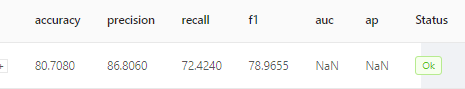